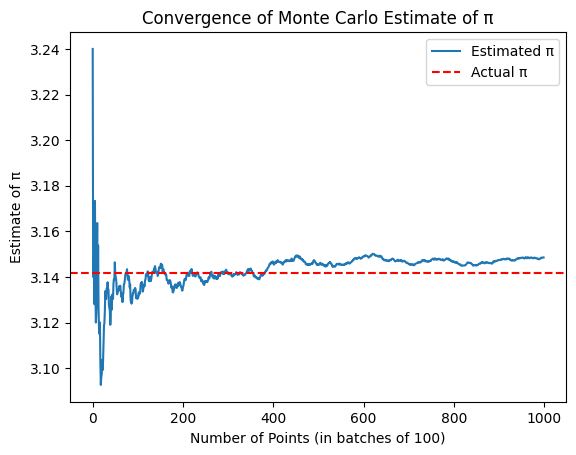

In [1]:
import numpy as np

def estimate_pi(num_points):
    """Estimate the value of π using Monte Carlo method with num_points random points and calculate variance."""
    inside_circle = 0
    estimates = []
    
    for i in range(1, num_points + 1):
        # Generate random points
        x, y = np.random.random(), np.random.random()
        
        # Check if the point is inside the unit circle
        if x**2 + y**2 <= 1:
            inside_circle += 1
        
        # Update the estimate for π using all points up to the current iteration
        if i % 100 == 0:  # Update every 100 points to reduce noise
            pi_estimate = (inside_circle / i) * 4
            estimates.append(pi_estimate)
    
    # Variance of the estimates
    variance = np.var(estimates)
    return estimates, variance

# Example usage:
num_samples = 100000  # Number of samples to estimate π
estimates, variance = estimate_pi(num_samples)

# Plot the convergence
import matplotlib.pyplot as plt

plt.plot(estimates, label="Estimated π")
plt.axhline(y=np.pi, color="r", linestyle="--", label="Actual π")
plt.xlabel("Number of Points (in batches of 100)")
plt.ylabel("Estimate of π")
plt.legend()
plt.title("Convergence of Monte Carlo Estimate of π")
plt.show()


In [2]:
#old monte carlo method
def estimate_pi(num_points):
    """Estimate the value of π using Monte Carlo method with num_points random points and calculate variance."""
    inside_circle = 0
    estimates = []

    for _ in range(num_points):
        x, y = np.random.random(), np.random.random()
        if x**2 + y**2 <= 1:
            inside_circle += 1
        pi_estimate = (inside_circle / (_ + 1)) * 4
        estimates.append(pi_estimate)
    
    variance = np.var(estimates)
    return pi_estimate, variance

In [4]:
# run this if you have issues with directories
import sys
import os
sys.path.append(os.path.abspath('.'))

Estimated π: 3.142416
Error in estimate: 0.00082334641020676


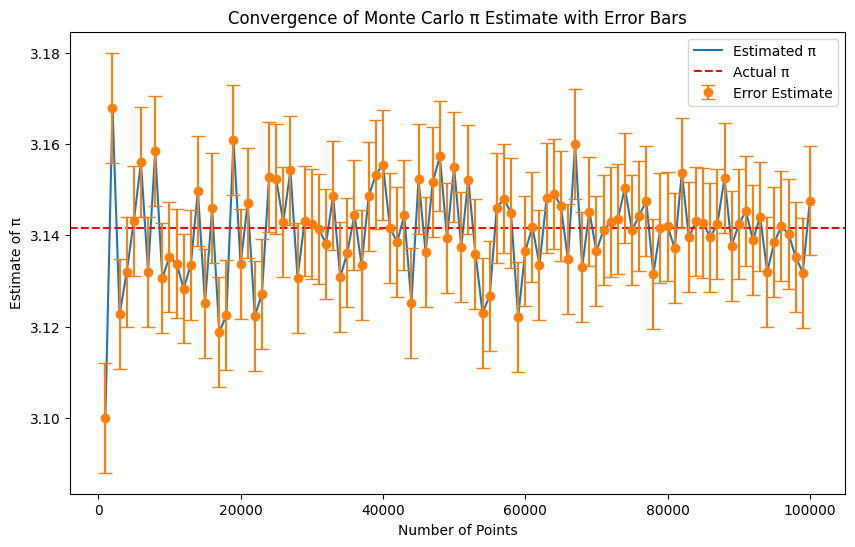

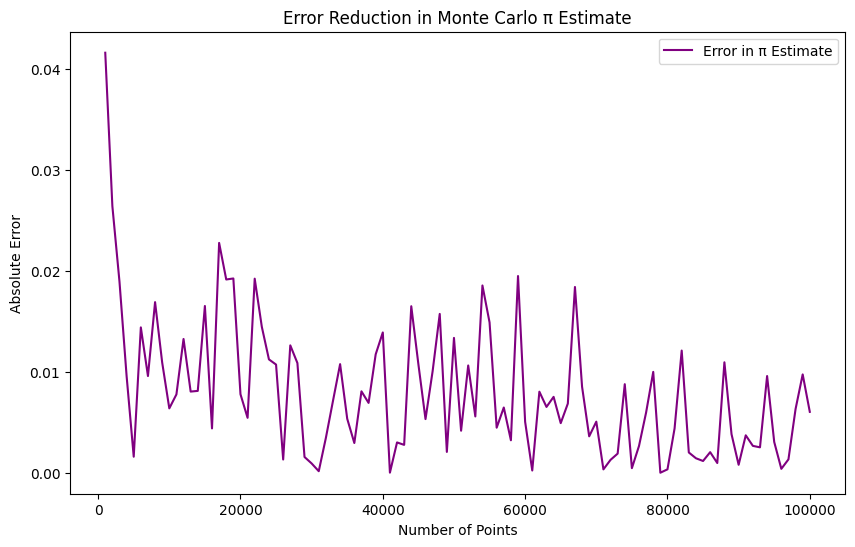

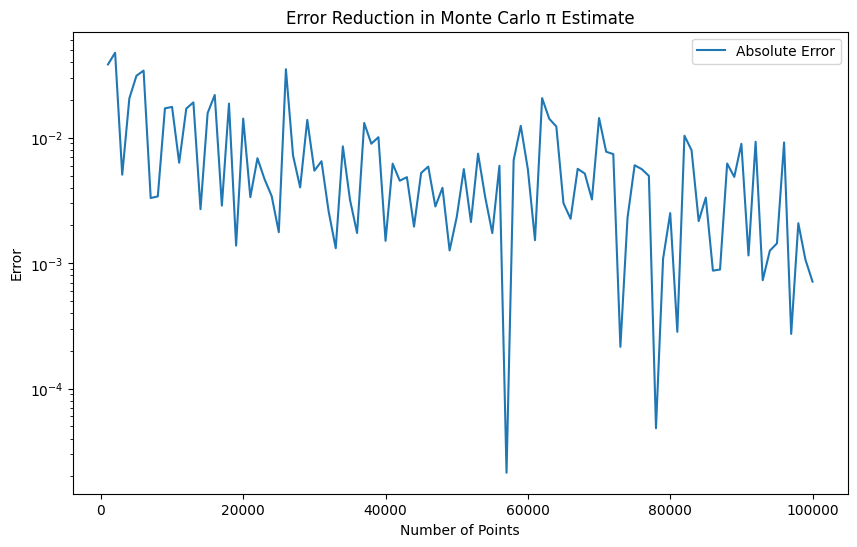

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Import custom functions from the .py files
from monte_carlo import estimate_pi
from plot_convergence import plot_convergence_and_error
from utils import calculate_error

# Set the number of samples
num_samples = 1000000

# Estimate π using Monte Carlo method
pi_estimate, _ = estimate_pi(num_samples)  # Unpack the tuple if estimate_pi returns a tuple

# Calculate error
error = calculate_error(pi_estimate, np.pi)  # Use np.pi as the true value of π
print(f"Estimated π: {pi_estimate}")
print(f"Error in estimate: {error}")

# Plot convergence with a maximum of 100,000 points, increasing by 1,000 at each step
plot_convergence_and_error(max_points=100000, step=1000)


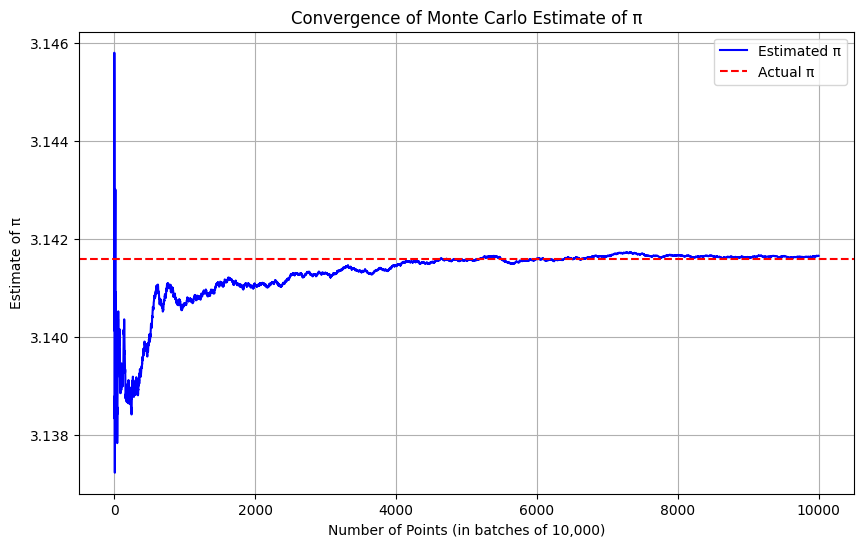

Estimated π: 3.14165704
Error: 6.438641020700686e-05


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Import custom functions from the .py files
#from monte_carlo import estimate_pi
#from plot_convergence import plot_convergence_and_error
#from utils import calculate_error

 
def estimate_pi(num_points, batch_size=10000):
    """Estimate the value of π using Monte Carlo method with num_points random points in batches."""
    # Initialize variables
    inside_circle = 0
    estimates = []
    
    # Process the points in batches for efficiency
    for i in range(batch_size, num_points + 1, batch_size):
        # Generate random points in a batch
        x = np.random.random(batch_size)
        y = np.random.random(batch_size)
        
        # Count points inside the unit circle
        inside_circle += np.sum(x**2 + y**2 <= 1)
        
        # Update the estimate of π based on the current batch
        pi_estimate = (inside_circle / i) * 4
        estimates.append(pi_estimate)
    
    # Return estimates
    return estimates

# Number of samples for Monte Carlo simulation (e.g., 10^8 for a decent estimate)
num_samples = 10**8  # Use 10 million points or higher for better convergence
batch_size = 10000    # Process in batches of 10,000 points

# Estimate π using Monte Carlo method
estimates = estimate_pi(num_samples, batch_size)

# Plot the convergence of π estimate
plt.figure(figsize=(10, 6))
plt.plot(estimates, label="Estimated π", color="blue")
plt.axhline(y=np.pi, color="red", linestyle="--", label="Actual π")
plt.xlabel("Number of Points (in batches of 10,000)")
plt.ylabel("Estimate of π")
plt.title("Convergence of Monte Carlo Estimate of π")
plt.legend()
plt.grid(True)
plt.show()

#error = calculate_error(pi_estimate, np.pi)  # Use np.pi as the true value of π
#print(f"Estimated π: {pi_estimate}")

# Get the final estimate of π from the batch process
final_pi_estimate = estimates[-1]

# Calculate the error between the final estimate and the true value of π
error = calculate_error(final_pi_estimate, np.pi)

print(f"Estimated π: {final_pi_estimate}")
print(f"Error: {error}")


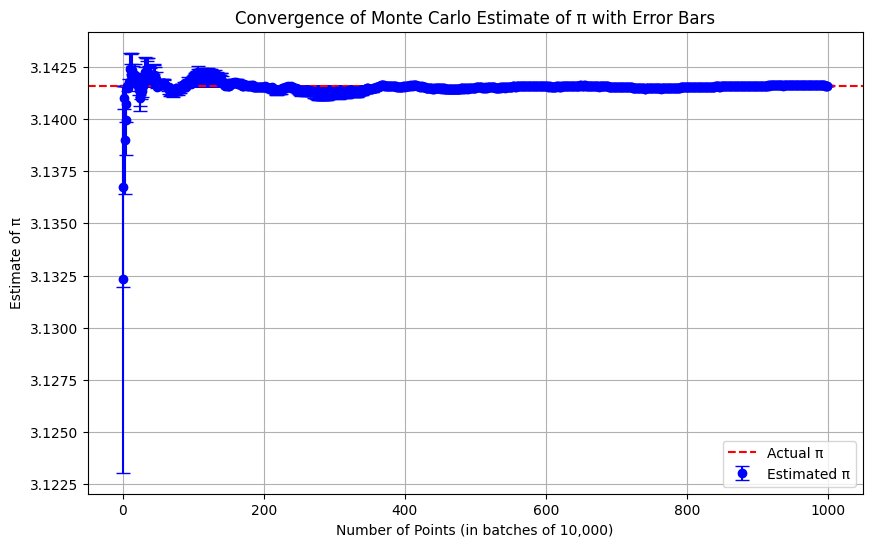

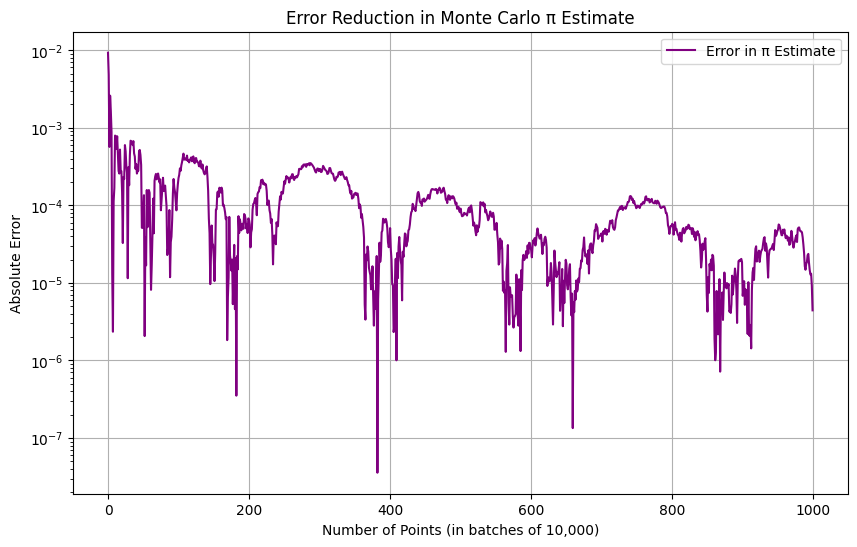

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_pi(num_points, batch_size=100000):
    """Estimate the value of π using Monte Carlo method with num_points random points in batches."""
    # Initialize variables
    inside_circle = 0
    estimates = []
    errors = []
    
    # Process the points in batches for efficiency
    for i in range(batch_size, num_points + 1, batch_size):
        # Generate random points in a batch
        x = np.random.random(batch_size)
        y = np.random.random(batch_size)
        
        # Count points inside the unit circle
        inside_circle += np.sum(x**2 + y**2 <= 1)
        
        # Update the estimate of π based on the current batch
        pi_estimate = (inside_circle / i) * 4
        estimates.append(pi_estimate)
        
        # Calculate the error (absolute difference from the true value of π)
        error = np.abs(pi_estimate - np.pi)
        errors.append(error)
    
    # Return estimates and errors
    return estimates, errors

# Number of samples for Monte Carlo simulation (e.g., 10^8 for a decent estimate)
num_samples = 10**8  # Use 10 million points or higher for better convergence
batch_size = 100000    # Process in batches of 10,000 points

# Estimate π using Monte Carlo method
estimates, errors = estimate_pi(num_samples, batch_size)

# Plot the convergence of π estimate with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(estimates)), estimates, yerr=errors, fmt='o', label="Estimated π", color="blue", capsize=5)
plt.axhline(y=np.pi, color="red", linestyle="--", label="Actual π")
plt.xlabel("Number of Points (in batches of 10,000)")
plt.ylabel("Estimate of π")
plt.title("Convergence of Monte Carlo Estimate of π with Error Bars")
plt.legend()
plt.grid(True)
plt.show()

# Plot the reduction of error as the number of points increases
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, label="Error in π Estimate", color="purple")
plt.yscale('log')  # Use logarithmic scale to highlight exponential-like decay
plt.xlabel("Number of Points (in batches of 10,000)")
plt.ylabel("Absolute Error")
plt.title("Error Reduction in Monte Carlo π Estimate")
plt.legend()
plt.grid(True)
plt.show()


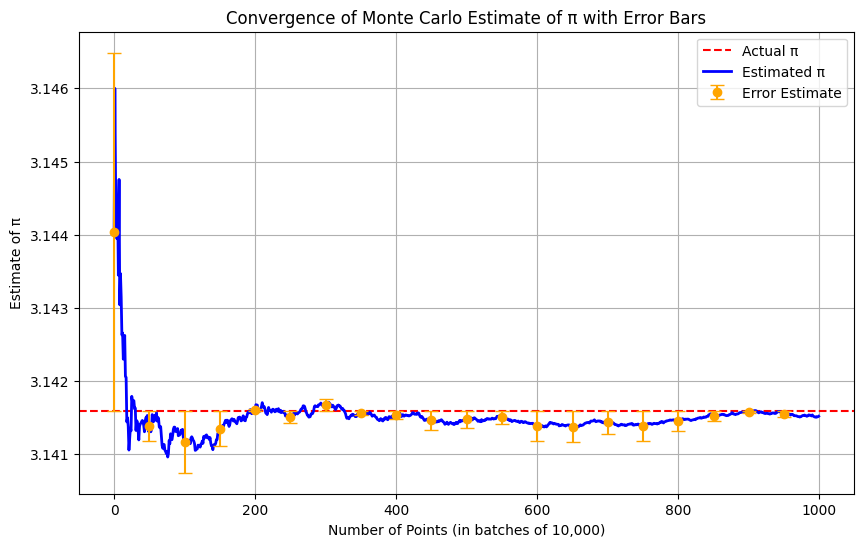

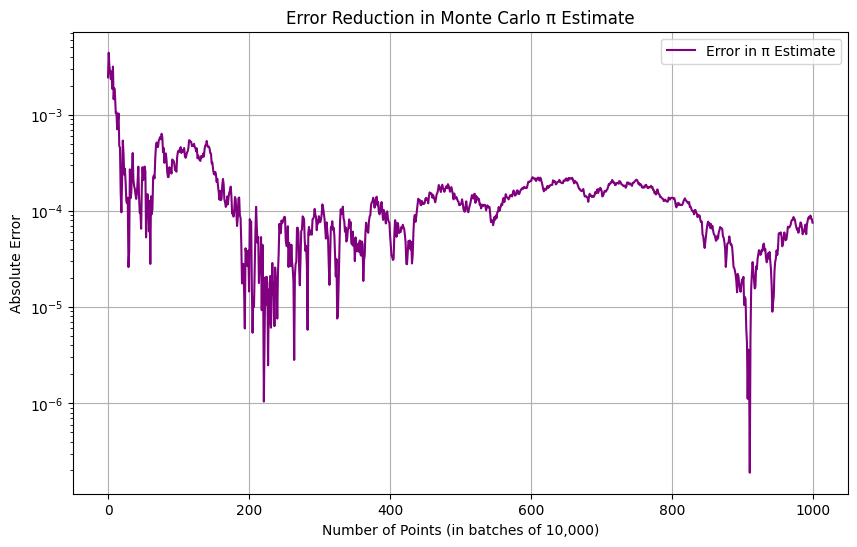

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_pi(num_points, batch_size=100000):
    """Estimate the value of π using Monte Carlo method with num_points random points in batches."""
    # Initialize variables
    inside_circle = 0
    estimates = []
    errors = []
    
    # Process the points in batches for efficiency
    for i in range(batch_size, num_points + 1, batch_size):
        # Generate random points in a batch
        x = np.random.random(batch_size)
        y = np.random.random(batch_size)
        
        # Count points inside the unit circle
        inside_circle += np.sum(x**2 + y**2 <= 1)
        
        # Update the estimate of π based on the current batch
        pi_estimate = (inside_circle / i) * 4
        estimates.append(pi_estimate)
        
        # Calculate the error (absolute difference from the true value of π)
        error = np.abs(pi_estimate - np.pi)
        errors.append(error)
    
    # Return estimates and errors
    return estimates, errors

# Number of samples for Monte Carlo simulation (e.g., 10^8 for a decent estimate)
num_samples = 10**8  # Use 10 million points or higher for better convergence
batch_size = 100000    # Process in batches of 100,000 points

# Estimate π using Monte Carlo method
estimates, errors = estimate_pi(num_samples, batch_size)

# Plot the convergence of π estimate with error bars
plt.figure(figsize=(10, 6))

# Plot the actual value of π as a horizontal line
plt.axhline(y=np.pi, color="red", linestyle="--", label="Actual π")

# Plot the estimated value of π using Monte Carlo
plt.plot(range(len(estimates)), estimates, label="Estimated π", color="blue", linewidth=2)

# Plot the error bars (only for every 100th point to reduce clutter)
plt.errorbar(range(0, len(estimates), 50), np.array(estimates)[::50], yerr=np.array(errors)[::50], fmt='o', label="Error Estimate", color="orange", capsize=5)

plt.xlabel("Number of Points (in batches of 10,000)")
plt.ylabel("Estimate of π")
plt.title("Convergence of Monte Carlo Estimate of π with Error Bars")
plt.legend()
plt.grid(True)
plt.show()

# Plot the reduction of error as the number of points increases
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, label="Error in π Estimate", color="purple")
plt.yscale('log')  # Use logarithmic scale to highlight exponential-like decay
plt.xlabel("Number of Points (in batches of 10,000)")
plt.ylabel("Absolute Error")
plt.title("Error Reduction in Monte Carlo π Estimate")
plt.legend()
plt.grid(True)
plt.show()


Estimated π: 3.140556
Error in estimate: 0.0010366535897929907


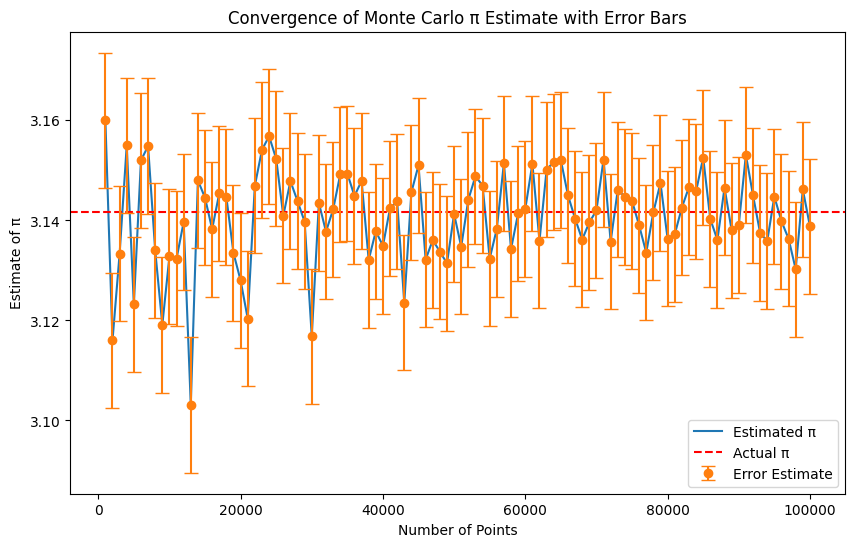

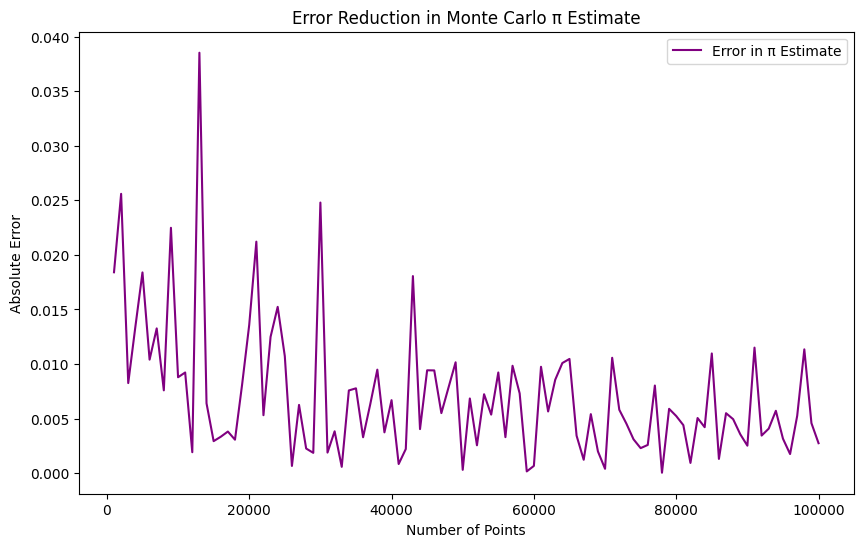

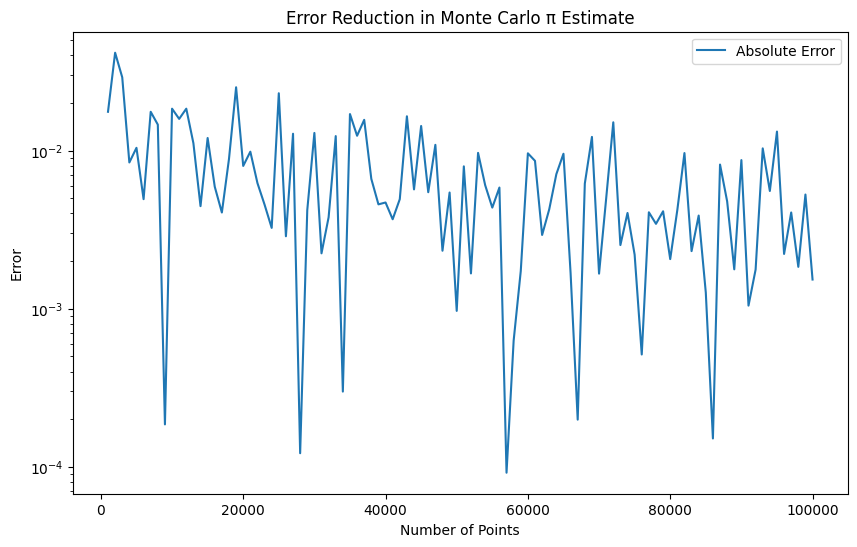

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Import custom functions from the .py files
from monte_carlo import estimate_pi
from plot_convergence import plot_convergence_and_error
from utils import calculate_error

# Set the number of samples
num_samples = 1000000

# Estimate π using Monte Carlo method
pi_estimate, _ = estimate_pi(num_samples)  # Unpack the tuple if estimate_pi returns a tuple

# Calculate error
error = calculate_error(pi_estimate, np.pi)  # Use np.pi as the true value of π
print(f"Estimated π: {pi_estimate}")
print(f"Error in estimate: {error}")

# Plot convergence with a maximum of 100,000 points, increasing by 1,000 at each step
plot_convergence_and_error(max_points=100000, step=1000)


Monte Carlo estimate of π: (3.14692, np.float64(0.00044173933615149197))
Plotting convergence and error reduction...


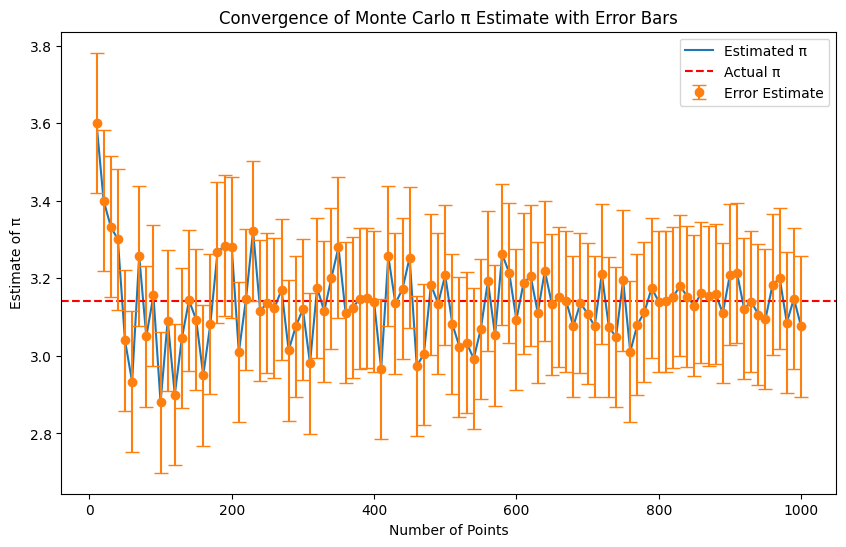

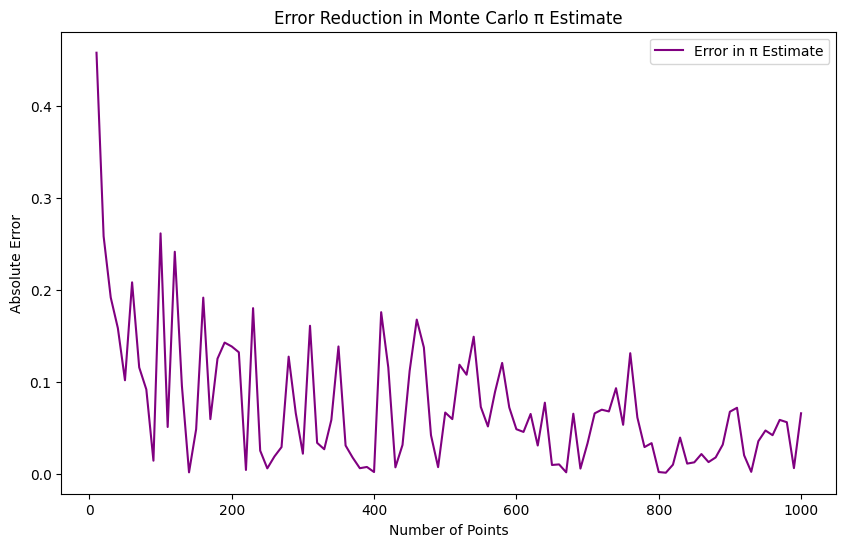

Estimating π using root-finding method...


[3.5,
 3.25,
 3.125,
 3.1875,
 3.15625,
 3.140625,
 3.1484375,
 3.14453125,
 3.142578125,
 3.1416015625,
 3.14111328125,
 3.141357421875,
 3.1414794921875,
 3.14154052734375,
 3.141571044921875,
 3.1415863037109375,
 3.1415939331054688,
 3.141590118408203,
 3.141592025756836]

In [ ]:
# 1st implementation of the Monte Carlo method to estimate π + error bars and convergence plot and root-finding method
# Import necessary functions from your .py files
from monte_carlo import estimate_pi
from plot_convergence import plot_convergence_and_error  # Updated function name
from root_finding import estimate_pi_root_finding

# Estimate π using Monte Carlo method
num_samples = 100000
pi_estimate_monte_carlo = estimate_pi(num_samples)
print(f"Monte Carlo estimate of π: {pi_estimate_monte_carlo}")

# Plot convergence and error of π estimates
print("Plotting convergence and error reduction...")
plot_convergence_and_error(max_points=1000, step=10)

# Estimate π using the root-finding method
print("Estimating π using root-finding method...")
estimate_pi_root_finding()


Monte Carlo estimate of π: (3.14056, np.float64(0.00016076260444094681))
Plotting error reduction...


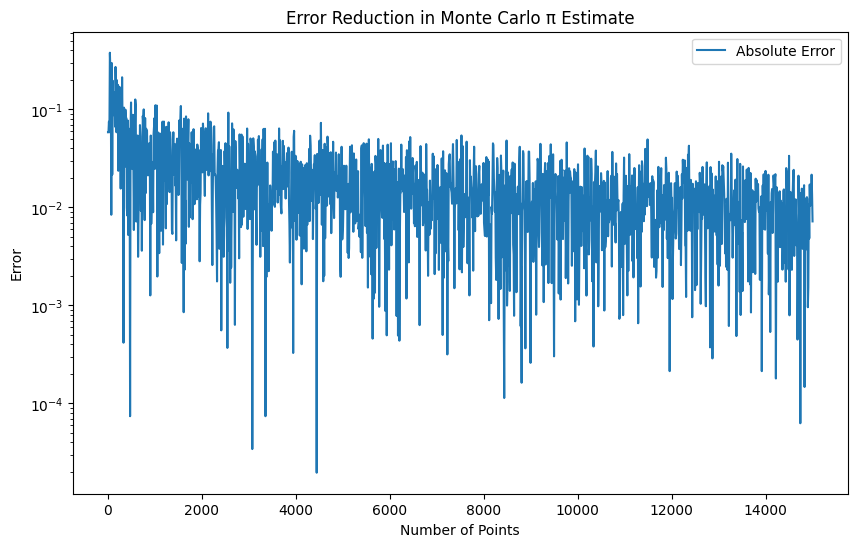

In [9]:
# Import necessary functions from your .py files
from monte_carlo import estimate_pi
from plot_convergence import plot_error_reduction  # New function for error plotting
from root_finding import estimate_pi_root_finding

# Estimate π using Monte Carlo method
num_samples = 100000
pi_estimate_monte_carlo = estimate_pi(num_samples)
print(f"Monte Carlo estimate of π: {pi_estimate_monte_carlo}")

# Plot only the error reduction
print("Plotting error reduction...")
plot_error_reduction(max_points=15000, step=10)



Monte Carlo estimate of π: (3.13556, np.float64(0.00025743267189820557))
Plotting error reduction...


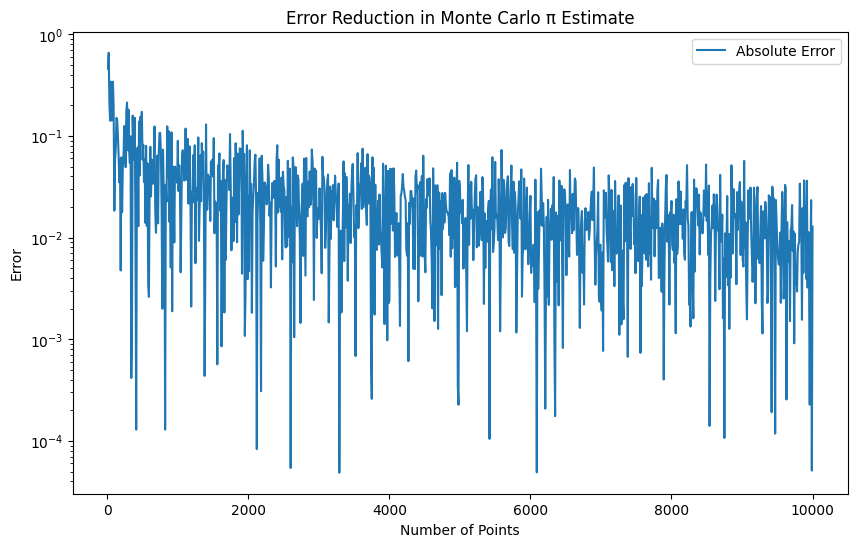

In [30]:
# Import necessary functions from your .py files
from monte_carlo import estimate_pi
from plot_convergence import plot_error_reduction  # New function for error plotting
from root_finding import estimate_pi_root_finding

# Estimate π using Monte Carlo method
num_samples = 100000
pi_estimate_monte_carlo = estimate_pi(num_samples)
print(f"Monte Carlo estimate of π: {pi_estimate_monte_carlo}")

# Plot only the error reduction
print("Plotting error reduction...")
plot_error_reduction(max_points=10000, step=10)



Monte Carlo estimate of π: (3.13928, np.float64(0.00017498585305571182))
Plotting convergence...


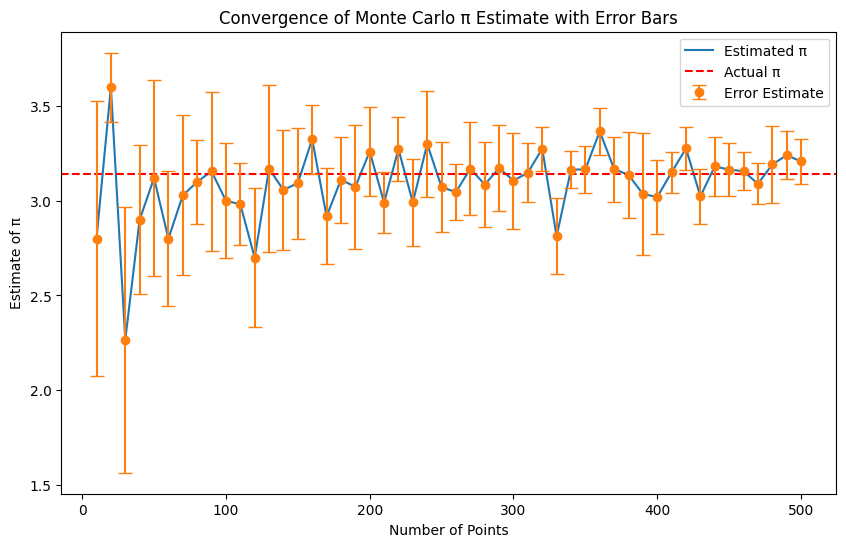

Estimating π using root-finding method...


[3.5,
 3.25,
 3.125,
 3.1875,
 3.15625,
 3.140625,
 3.1484375,
 3.14453125,
 3.142578125,
 3.1416015625,
 3.14111328125,
 3.141357421875,
 3.1414794921875,
 3.14154052734375,
 3.141571044921875,
 3.1415863037109375,
 3.1415939331054688,
 3.141590118408203,
 3.141592025756836]

In [31]:
# Import necessary functions from your .py files
from monte_carlo import estimate_pi
from plot_convergence import plot_convergence
from root_finding import estimate_pi_root_finding

# Estimate π using Monte Carlo method
num_samples = 100000
pi_estimate_monte_carlo = estimate_pi(num_samples)
print(f"Monte Carlo estimate of π: {pi_estimate_monte_carlo}")

# Plot convergence of π estimates
print("Plotting convergence...")
plot_convergence(max_points=500, step=10)

# Estimate π using the root-finding method
print("Estimating π using root-finding method...")
estimate_pi_root_finding()


Monte Carlo estimate of π: (3.14384, np.float64(0.00023357995696941548))
Plotting convergence...


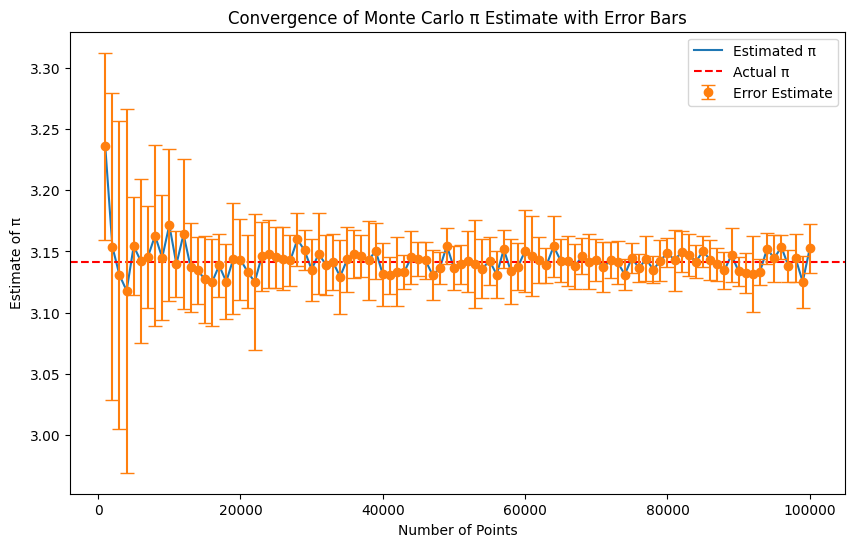

Estimating π using root-finding method...


[3.5,
 3.25,
 3.125,
 3.1875,
 3.15625,
 3.140625,
 3.1484375,
 3.14453125,
 3.142578125,
 3.1416015625,
 3.14111328125,
 3.141357421875,
 3.1414794921875,
 3.14154052734375,
 3.141571044921875,
 3.1415863037109375,
 3.1415939331054688,
 3.141590118408203,
 3.141592025756836]

In [ ]:
# Import necessary functions from your .py files
from monte_carlo import estimate_pi
from plot_convergence import plot_convergence
from root_finding import estimate_pi_root_finding

# Estimate π using Monte Carlo method
num_samples = 100000
pi_estimate_monte_carlo = estimate_pi(num_samples)
print(f"Monte Carlo estimate of π: {pi_estimate_monte_carlo}")

# Plot convergence of π estimates
print("Plotting convergence...")
plot_convergence(max_points=100000, step=1000)

# Estimate π using the root-finding method
print("Estimating π using root-finding method...")
estimate_pi_root_finding()


In [ ]:
# A new function to estimate π using the Nilakantha series
from utils import estimate_pi_nilakantha

def main():
    print("Estimating π using different methods:")
    
    # Nilakantha Series
    pi_nilakantha = estimate_pi_nilakantha(1000)
    print(f"Nilakantha Series estimate: {pi_nilakantha}")
    
if __name__ == "__main__":
    main()


Estimating π using different methods:
Nilakantha Series estimate: 3.141592653340544


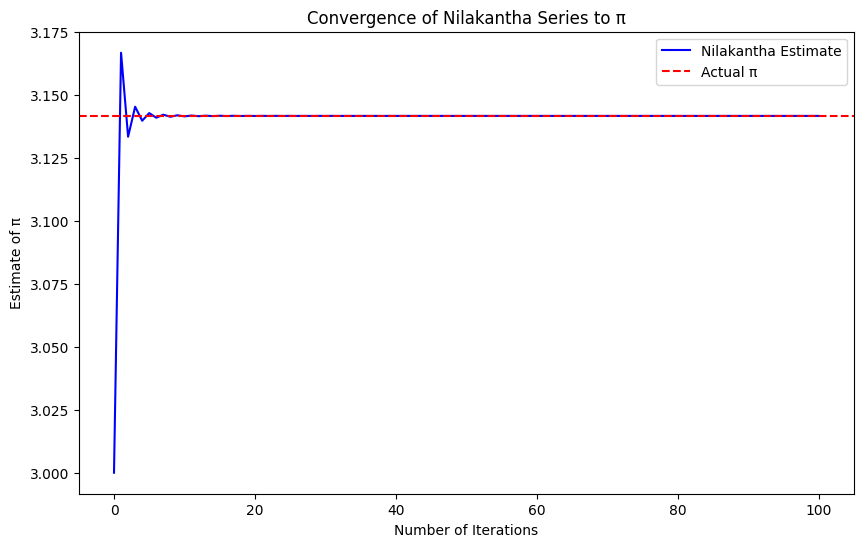

In [18]:
import matplotlib.pyplot as plt
import math
from utils import estimate_pi_nilakantha

# Generate Nilakantha estimates
iterations = 100
nilakantha_estimates = estimate_pi_nilakantha(iterations)

# Plot Nilakantha convergence
plt.figure(figsize=(10, 6))
plt.plot(nilakantha_estimates, label="Nilakantha Estimate", color="blue")
plt.axhline(y=math.pi, color="red", linestyle="--", label="Actual π")  # Corrected line
plt.xlabel("Number of Iterations")
plt.ylabel("Estimate of π")
plt.title("Convergence of Nilakantha Series to π")
plt.legend()
plt.show()


In [17]:
# just a new method to estimate pi using the Gauss-Legendre algorithm (internet suggested this so I wanted to see how it comaprares
# to the other methods)
def estimate_pi_gauss_legendre(iterations):
    a = 1.0
    b = 1 / math.sqrt(2)
    t = 0.25
    p = 1.0
    estimates = []

    for _ in range(iterations):
        a_next = (a + b) / 2
        b = math.sqrt(a * b)
        t -= p * (a - a_next) ** 2
        a = a_next
        p *= 2
        pi_estimate = ((a + b) ** 2) / (4 * t)
        estimates.append(pi_estimate)

    return estimates


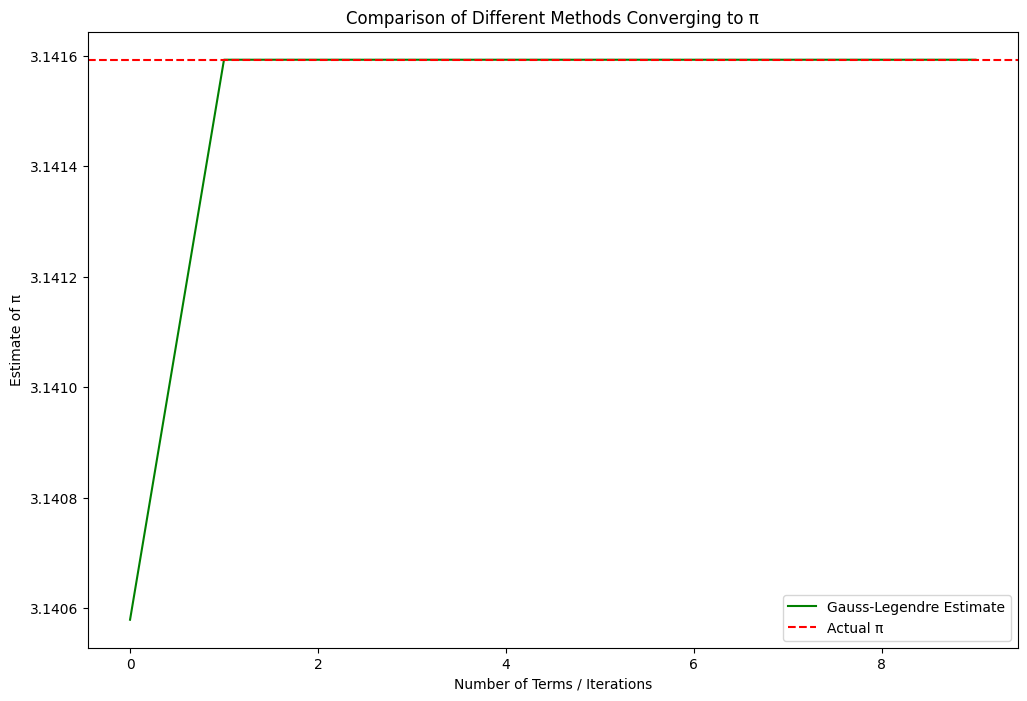

In [15]:
# Make sure you run the cell directly above this one before running this cell
# Generate estimates
gauss_legendre_estimates = estimate_pi_gauss_legendre(10)  # Fewer iterations since it converges faster

# Plot convergence
plt.figure(figsize=(12, 8))
plt.plot(range(0, len(gauss_legendre_estimates)), gauss_legendre_estimates, label="Gauss-Legendre Estimate", color="green")
plt.axhline(y=math.pi, color="red", linestyle="--", label="Actual π")
plt.xlabel("Number of Terms / Iterations")
plt.ylabel("Estimate of π")
plt.title("Comparison of Different Methods Converging to π")
plt.legend()
plt.show()


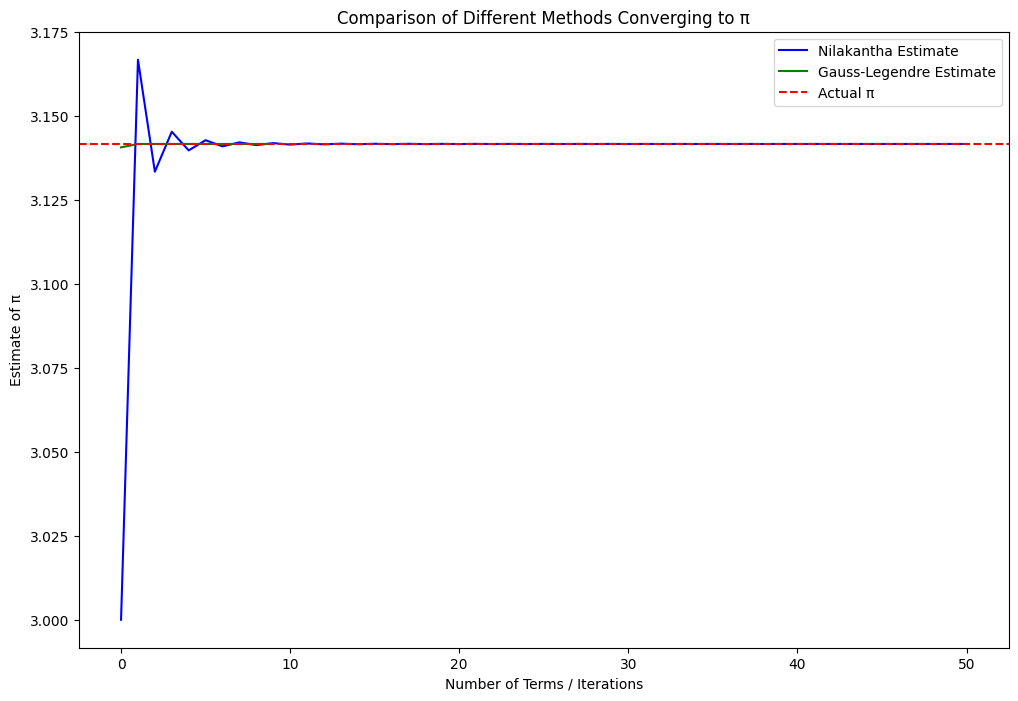

In [12]:
# Ensure you run the cell defining `estimate_pi_nilakantha` and `estimate_pi_gauss_legendre` before this cell
import matplotlib.pyplot as plt
import math
from utils import estimate_pi_nilakantha
from utils import estimate_pi_gauss_legendre
# Generate estimates
iterations = 50
nilakantha_estimates = estimate_pi_nilakantha(iterations)
gauss_legendre_estimates = estimate_pi_gauss_legendre(10)  # Fewer iterations since it converges faster

# Plot convergence
plt.figure(figsize=(12, 8))
plt.plot(nilakantha_estimates, label="Nilakantha Estimate", color="blue")
plt.plot(range(0, len(gauss_legendre_estimates)), gauss_legendre_estimates, label="Gauss-Legendre Estimate", color="green")
plt.axhline(y=math.pi, color="red", linestyle="--", label="Actual π")
plt.xlabel("Number of Terms / Iterations")
plt.ylabel("Estimate of π")
plt.title("Comparison of Different Methods Converging to π")
plt.legend()
plt.show()


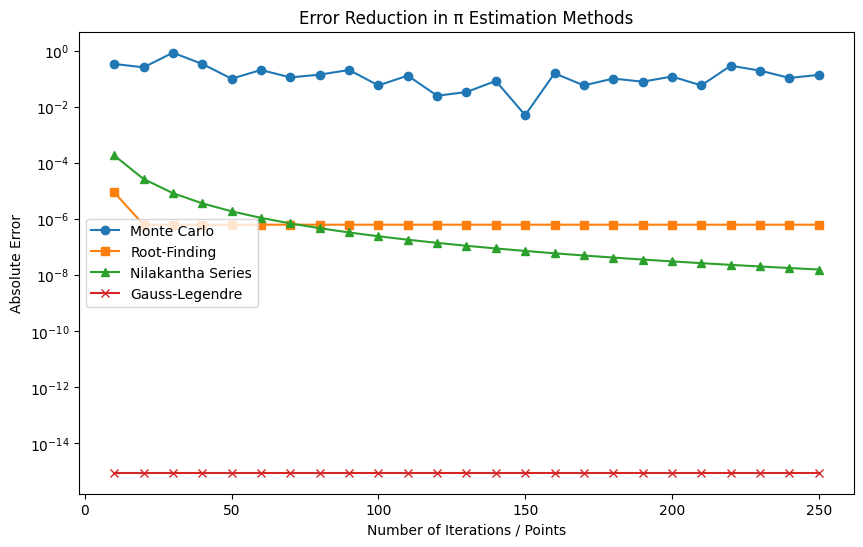

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from monte_carlo import estimate_pi as estimate_pi_monte_carlo
from root_finding import estimate_pi_root_finding
from utils import calculate_error
from utils import estimate_pi_nilakantha
from utils import estimate_pi_gauss_legendre

def plot_error_comparison(max_iterations, step):
    """Plot the error reduction for various methods of estimating π."""
    points = range(step, max_iterations + 1, step)
    errors_monte_carlo = []
    errors_root_finding = []
    errors_nilakantha = []
    errors_gauss_legendre = []

    for num_points in points:
        # Monte Carlo Method
        pi_estimate_mc, _ = estimate_pi_monte_carlo(num_points)
        error_mc = abs(pi_estimate_mc - np.pi)
        errors_monte_carlo.append(error_mc)

        # Root-Finding Method
        pi_estimates_rf = estimate_pi_root_finding(tol=1e-6, max_iter=num_points)
        error_rf = abs(pi_estimates_rf[-1] - np.pi)  # Use the last estimate
        errors_root_finding.append(error_rf)

        # Nilakantha Series
        pi_estimate_nil = estimate_pi_nilakantha(num_points)
        error_nil = abs(pi_estimate_nil[-1] - np.pi)  # Use the last estimate
        errors_nilakantha.append(error_nil)

        # Gauss-Legendre Algorithm
        pi_estimate_gl = estimate_pi_gauss_legendre(num_points)
        error_gl = abs(pi_estimate_gl[-1] - np.pi)  # Use the last estimate
        errors_gauss_legendre.append(error_gl)

    # Plot the error reduction for each method
    plt.figure(figsize=(10, 6))
    plt.plot(points, errors_monte_carlo, label="Monte Carlo", marker='o')
    plt.plot(points, errors_root_finding, label="Root-Finding", marker='s')
    plt.plot(points, errors_nilakantha, label="Nilakantha Series", marker='^')
    plt.plot(points, errors_gauss_legendre, label="Gauss-Legendre", marker='x')

    plt.yscale('log')  # Use logarithmic scale for y-axis to highlight exponential-like decay
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Absolute Error")
    plt.title("Error Reduction in π Estimation Methods")
    plt.legend()
    plt.show()

# Run the function to plot the error comparison
plot_error_comparison(max_iterations=250, step=10)


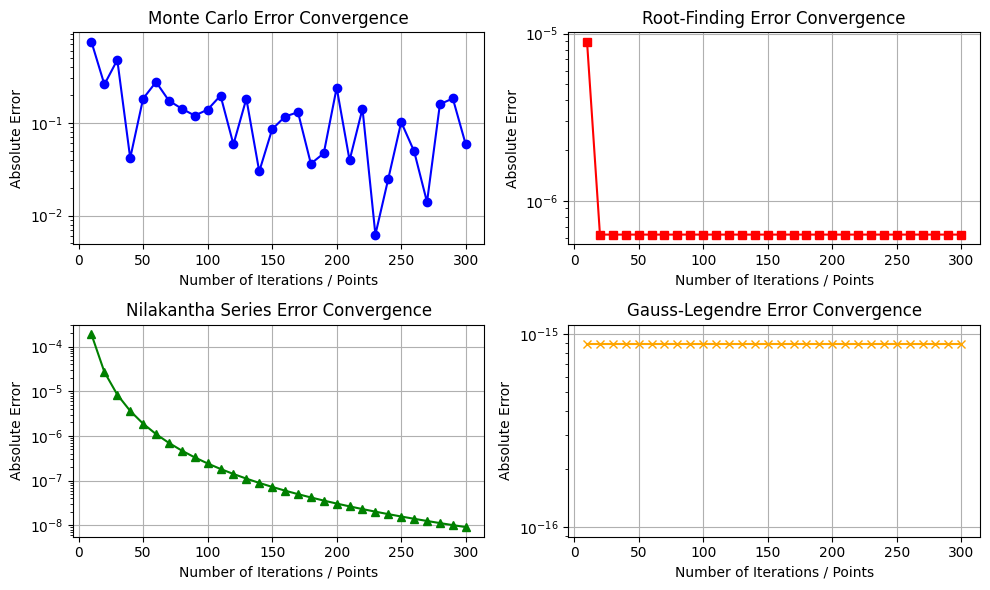

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from monte_carlo import estimate_pi as estimate_pi_monte_carlo
from root_finding import estimate_pi_root_finding
from utils import estimate_pi_nilakantha
from utils import estimate_pi_gauss_legendre

def plot_error_comparison(max_iterations, step):
    """Plot the error reduction for various methods of estimating π."""
    points = range(step, max_iterations + 1, step)
    errors_monte_carlo = []
    errors_root_finding = []
    errors_nilakantha = []
    errors_gauss_legendre = []

    for num_points in points:
        # Monte Carlo Method
        pi_estimate_mc, _ = estimate_pi_monte_carlo(num_points)
        error_mc = abs(pi_estimate_mc - np.pi)
        errors_monte_carlo.append(error_mc)

        # Root-Finding Method
        pi_estimates_rf = estimate_pi_root_finding(tol=1e-6, max_iter=num_points)
        error_rf = abs(pi_estimates_rf[-1] - np.pi)  # Use the last estimate
        errors_root_finding.append(error_rf)

        # Nilakantha Series
        pi_estimate_nil = estimate_pi_nilakantha(num_points)
        error_nil = abs(pi_estimate_nil[-1] - np.pi)  # Use the last estimate
        errors_nilakantha.append(error_nil)

        # Gauss-Legendre Algorithm
        pi_estimate_gl = estimate_pi_gauss_legendre(num_points)
        error_gl = abs(pi_estimate_gl[-1] - np.pi)  # Use the last estimate
        errors_gauss_legendre.append(error_gl)


    # Plot the error convergence for each method on separate plots
    plt.figure(figsize=(10, 6))

    # Plot Monte Carlo Error Convergence
    plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
    plt.plot(points, errors_monte_carlo, label="Monte Carlo", marker='o', color='blue')
    plt.yscale('log')
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Absolute Error")
    plt.title("Monte Carlo Error Convergence")
    plt.grid(True)

    # Plot Root-Finding Error Convergence
    plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
    plt.plot(points, errors_root_finding, label="Root-Finding", marker='s', color='red')
    plt.yscale('log')
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Absolute Error")
    plt.title("Root-Finding Error Convergence")
    plt.grid(True)

    # Plot Nilakantha Error Convergence
    plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
    plt.plot(points, errors_nilakantha, label="Nilakantha Series", marker='^', color='green')
    plt.yscale('log')
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Absolute Error")
    plt.title("Nilakantha Series Error Convergence")
    plt.grid(True)

    # Plot Gauss-Legendre Error Convergence
    plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
    plt.plot(points, errors_gauss_legendre, label="Gauss-Legendre", marker='x', color='orange')
    plt.yscale('log')
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Absolute Error")
    plt.title("Gauss-Legendre Error Convergence")
    plt.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Run the function to plot the error comparison and convergence
plot_error_comparison(max_iterations=300, step=10)


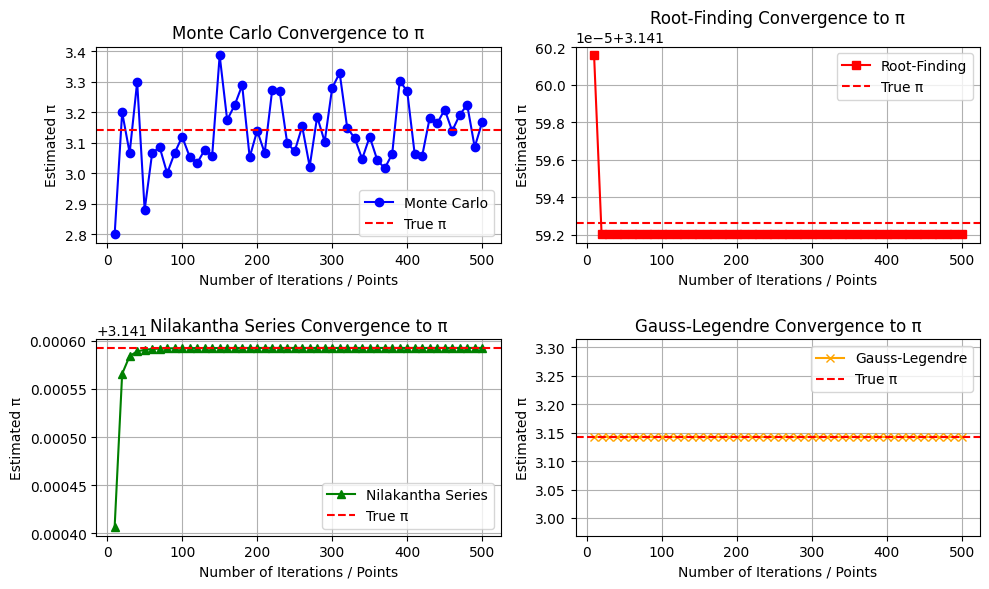

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from monte_carlo import estimate_pi as estimate_pi_monte_carlo
from root_finding import estimate_pi_root_finding
from utils import estimate_pi_nilakantha
from utils import estimate_pi_gauss_legendre

def plot_convergence_to_pi(max_iterations, step):
    """Plot the convergence of various methods to the estimate of π."""
    points = range(step, max_iterations + 1, step)
    pi_estimates_monte_carlo = []
    pi_estimates_root_finding = []
    pi_estimates_nilakantha = []
    pi_estimates_gauss_legendre = []

    for num_points in points:
        # Monte Carlo Method
        pi_estimate_mc, _ = estimate_pi_monte_carlo(num_points)
        pi_estimates_monte_carlo.append(pi_estimate_mc)

        # Root-Finding Method
        pi_estimates_rf = estimate_pi_root_finding(tol=1e-6, max_iter=num_points)
        pi_estimates_root_finding.append(pi_estimates_rf[-1])  # Use the last estimate

        # Nilakantha Series
        pi_estimate_nil = estimate_pi_nilakantha(num_points)
        pi_estimates_nilakantha.append(pi_estimate_nil[-1])  # Use the last estimate

        # Gauss-Legendre Algorithm
        pi_estimate_gl = estimate_pi_gauss_legendre(num_points)
        pi_estimates_gauss_legendre.append(pi_estimate_gl[-1])  # Use the last estimate

    # Plot the convergence of each method towards the true value of pi
    plt.figure(figsize=(10, 6))

    # Plot Monte Carlo Convergence
    plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
    plt.plot(points, pi_estimates_monte_carlo, label="Monte Carlo", marker='o', color='blue')
    plt.axhline(y=np.pi, color='r', linestyle='--', label="True π")
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Estimated π")
    plt.title("Monte Carlo Convergence to π")
    plt.legend()
    plt.grid(True)

    # Plot Root-Finding Convergence
    plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
    plt.plot(points, pi_estimates_root_finding, label="Root-Finding", marker='s', color='red')
    plt.axhline(y=np.pi, color='r', linestyle='--', label="True π")
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Estimated π")
    plt.title("Root-Finding Convergence to π")
    plt.legend()
    plt.grid(True)

    # Plot Nilakantha Convergence
    plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
    plt.plot(points, pi_estimates_nilakantha, label="Nilakantha Series", marker='^', color='green')
    plt.axhline(y=np.pi, color='r', linestyle='--', label="True π")
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Estimated π")
    plt.title("Nilakantha Series Convergence to π")
    plt.legend()
    plt.grid(True)

    # Plot Gauss-Legendre Convergence
    plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
    plt.plot(points, pi_estimates_gauss_legendre, label="Gauss-Legendre", marker='x', color='orange')
    plt.axhline(y=np.pi, color='r', linestyle='--', label="True π")
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Estimated π")
    plt.title("Gauss-Legendre Convergence to π")
    plt.legend()
    plt.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Run the function to plot the convergence to pi
plot_convergence_to_pi(max_iterations=500, step=10)


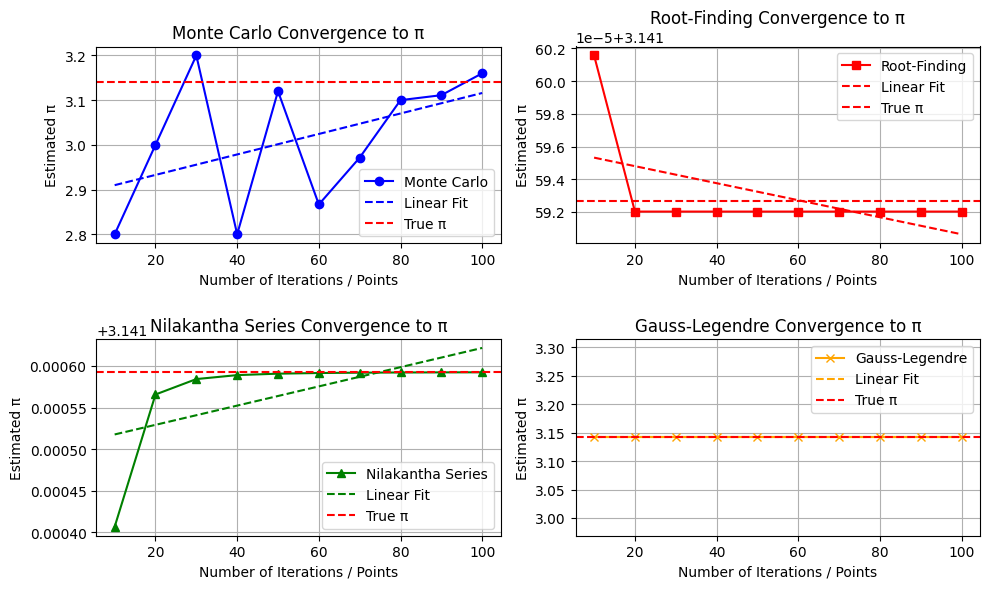

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from monte_carlo import estimate_pi as estimate_pi_monte_carlo
from root_finding import estimate_pi_root_finding
from utils import estimate_pi_nilakantha
from utils import estimate_pi_gauss_legendre

def linear_regression(x, y):
    """Custom function for linear regression (y = mx + b)."""
    # Use numpy's polyfit to fit a linear model
    m, b = np.polyfit(x, y, 1)
    return m, b

def plot_convergence_with_regression(max_iterations, step):
    """Plot the convergence of various methods to the estimate of π with linear regression."""
    points = range(step, max_iterations + 1, step)
    pi_estimates_monte_carlo = []
    pi_estimates_root_finding = []
    pi_estimates_nilakantha = []
    pi_estimates_gauss_legendre = []

    for num_points in points:
        # Monte Carlo Method
        pi_estimate_mc, _ = estimate_pi_monte_carlo(num_points)
        pi_estimates_monte_carlo.append(pi_estimate_mc)

        # Root-Finding Method
        pi_estimates_rf = estimate_pi_root_finding(tol=1e-6, max_iter=num_points)
        pi_estimates_root_finding.append(pi_estimates_rf[-1])  # Use the last estimate

        # Nilakantha Series
        pi_estimate_nil = estimate_pi_nilakantha(num_points)
        pi_estimates_nilakantha.append(pi_estimate_nil[-1])  # Use the last estimate

        # Gauss-Legendre Algorithm
        pi_estimate_gl = estimate_pi_gauss_legendre(num_points)
        pi_estimates_gauss_legendre.append(pi_estimate_gl[-1])  # Use the last estimate

    # Create a new figure for plotting
    plt.figure(figsize=(10, 6))

    # Monte Carlo Method Linear Regression
    m_mc, b_mc = linear_regression(points, pi_estimates_monte_carlo)
    plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
    plt.plot(points, pi_estimates_monte_carlo, label="Monte Carlo", marker='o', color='blue')
    plt.plot(points, np.array(points) * m_mc + b_mc, label="Linear Fit", color='blue', linestyle='--')
    plt.axhline(y=np.pi, color='r', linestyle='--', label="True π")
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Estimated π")
    plt.title("Monte Carlo Convergence to π")
    plt.legend()
    plt.grid(True)

    # Root-Finding Method Linear Regression
    m_rf, b_rf = linear_regression(points, pi_estimates_root_finding)
    plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
    plt.plot(points, pi_estimates_root_finding, label="Root-Finding", marker='s', color='red')
    plt.plot(points, np.array(points) * m_rf + b_rf, label="Linear Fit", color='red', linestyle='--')
    plt.axhline(y=np.pi, color='r', linestyle='--', label="True π")
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Estimated π")
    plt.title("Root-Finding Convergence to π")
    plt.legend()
    plt.grid(True)

    # Nilakantha Series Linear Regression
    m_nil, b_nil = linear_regression(points, pi_estimates_nilakantha)
    plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
    plt.plot(points, pi_estimates_nilakantha, label="Nilakantha Series", marker='^', color='green')
    plt.plot(points, np.array(points) * m_nil + b_nil, label="Linear Fit", color='green', linestyle='--')
    plt.axhline(y=np.pi, color='r', linestyle='--', label="True π")
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Estimated π")
    plt.title("Nilakantha Series Convergence to π")
    plt.legend()
    plt.grid(True)

    # Gauss-Legendre Algorithm Linear Regression
    m_gl, b_gl = linear_regression(points, pi_estimates_gauss_legendre)
    plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
    plt.plot(points, pi_estimates_gauss_legendre, label="Gauss-Legendre", marker='x', color='orange')
    plt.plot(points, np.array(points) * m_gl + b_gl, label="Linear Fit", color='orange', linestyle='--')
    plt.axhline(y=np.pi, color='r', linestyle='--', label="True π")
    plt.xlabel("Number of Iterations / Points")
    plt.ylabel("Estimated π")
    plt.title("Gauss-Legendre Convergence to π")
    plt.legend()
    plt.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Run the function to plot the convergence with linear regression
plot_convergence_with_regression(max_iterations=100, step=10)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from monte_carlo import estimate_pi_parallel
# Function to estimate Pi for a single batch
def estimate_batch(batch_size):
    x = np.random.random(batch_size)
    y = np.random.random(batch_size)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    return inside_circle

def estimate_pi_parallel(num_points, batch_size=1000):
    """Estimate π using Monte Carlo method with parallelized batches."""
    num_batches = num_points // batch_size
    estimates = []
    inside_circle_total = 0

    print(f"Starting the parallel Monte Carlo simulation with {num_batches} batches.")
    
    with multiprocessing.Pool() as pool:
        # Split work into batches and process them in parallel
        results = pool.map(estimate_batch, [batch_size] * num_batches)
        
        for i, result in enumerate(results, 1):
            inside_circle_total += result
            pi_estimate = (inside_circle_total / (i * batch_size)) * 4
            estimates.append(pi_estimate)
            
            if i % 100 == 0:  # Print status every 100 batches
                print(f"Batch {i}/{num_batches} completed. Current estimate of π: {pi_estimate}")
    
    print("Simulation complete.")
    return estimates

if __name__ == "__main__":  # Ensure this is added for Windows compatibility
    num_samples = 10**3  # Reduce the number of samples for faster processing
    batch_size = 1000   # Process in batches of 10,000 points

    # Estimate π using the parallelized Monte Carlo method
    estimates = estimate_pi_parallel(num_samples, batch_size)

    # Plot the convergence of π estimate
    plt.figure(figsize=(10, 6))
    plt.plot(estimates, label="Estimated π", color="blue")
    plt.axhline(y=np.pi, color="red", linestyle="--", label="Actual π")
    plt.xlabel("Number of Points (in batches of 10,000)")
    plt.ylabel("Estimate of π")
    plt.title("Convergence of Monte Carlo Estimate of π")
    plt.legend()
    plt.grid(True)
    plt.show()
